# Comparison Plots
### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from src.config.plot_settings import beautify_plot, apply_global_plot_settings

### HHCART D Models
The cell below plots the coverage vs density of the 4 best hhcart models with 2 to 5 features ran on the data.

Figure saved: data/comparison/coverage_density_hhcart_d_comparison.png


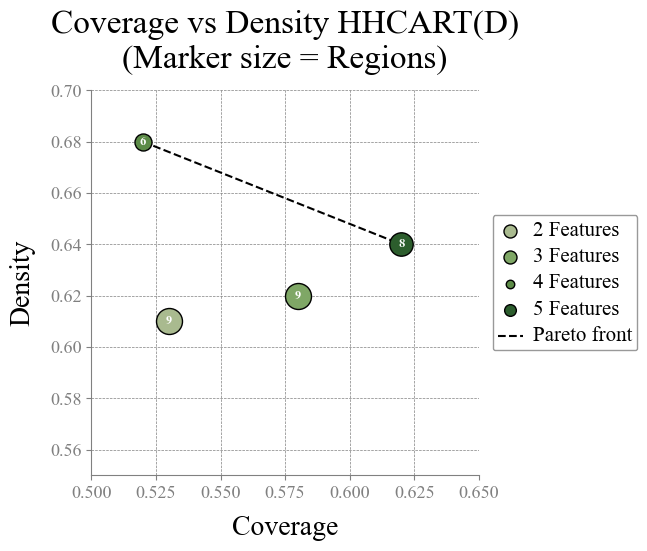

'data/comparison/coverage_density_hhcart_d_comparison.png'

In [2]:
# === Apply global style settings
apply_global_plot_settings()

# === Data (Coverage/Density as fractions)
df = pd.DataFrame({
    'Features': [2, 3, 4, 5],
    'Coverage': [0.53, 0.58, 0.52, 0.62],
    'Density': [0.61, 0.62, 0.68, 0.64],
    'Regions': [9, 9, 6, 8]
})

# === Color and Size mapping
color_map = {
    2: "#A9BA8F",
    3: "#7FA766",
    4: "#5C8B47",
    5: "#2C5D2D"
}
df['Color'] = df['Features'].map(color_map)

min_size, max_size = 150, 350
region_range = df['Regions'].max() - df['Regions'].min()
df['Size'] = min_size + (df['Regions'] - df['Regions'].min()) / region_range * (max_size - min_size)

# === Sort so smaller dots are drawn last (appear on top)
df = df.sort_values(by="Size", ascending=False).reset_index(drop=True)

# === Plot
fig, ax = plt.subplots(figsize=(5, 5))
for i in df.index:
    x = df.loc[i, 'Coverage']
    y = df.loc[i, 'Density']
    ax.scatter(x, y,
               s=df.loc[i, 'Size'],
               c=df.loc[i, 'Color'],
               edgecolor='black',
               zorder=10 + i)
    # Annotate number of regions
    ax.text(x, y, str(df.loc[i, 'Regions']),
            ha='center', va='center', fontsize=9, color='white', weight='bold', zorder=100)

# === Compute true Pareto frontier: not dominated in both dimensions
pareto_points = []
for i, row_i in df.iterrows():
    dominated = False
    for j, row_j in df.iterrows():
        if i == j:
            continue
        if (
            row_j["Coverage"] >= row_i["Coverage"]
            and row_j["Density"] >= row_i["Density"]
            and (row_j["Coverage"] > row_i["Coverage"] or row_j["Density"] > row_i["Density"])
        ):
            dominated = True
            break
    if not dominated:
        pareto_points.append((row_i["Coverage"], row_i["Density"]))

# === Plot Pareto front line behind points
if len(pareto_points) > 1:
    pareto_points = sorted(pareto_points, key=lambda tup: tup[0])
    pareto_x, pareto_y = zip(*pareto_points)
    ax.plot(pareto_x, pareto_y, linestyle='--', color='black', linewidth=1.5, zorder=2)

# === Legend handles: one per feature count + Pareto front
legend_handles = []
used_features = df['Features'].unique()
for feat in sorted(used_features):
    size = df[df['Features'] == feat]['Size'].iloc[0]
    color = df[df['Features'] == feat]['Color'].iloc[0]
    legend_handles.append(plt.Line2D([0], [0], marker='o', markersize=(size ** 0.5) / 2,
                                     color='black', markerfacecolor=color,
                                     linestyle='None', label=f"{feat} Features"))

# === Add Pareto front dashed line to legend
pareto_handle = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Pareto front')
legend_handles.append(pareto_handle)

# === Final legend
ax.legend(handles=legend_handles, fontsize=9, 
          loc='center left', bbox_to_anchor=(1.02, 0.5))

# === Axes
ax.set_xlim(0.5, 0.65)
ax.set_ylim(0.55, 0.7)

# === Beautify and save
save_path = "data/comparison/coverage_density_hhcart_d_comparison.png"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density HHCART(D)\n(Marker size = Regions)",
              save_path=save_path,
              show_grid=True)

save_path

### HHCART D vs Established Methods
The cell below plots the coverage vs density of the 2 best HHCART(D) models with 2 to 5 features, compared to the established methods.

Pareto-optimal points (Coverage, Density):
  - HHCART(D) (4 Features): (0.52, 0.68)
  - CART: (0.66, 0.64)
  - PRIM (Box 5): (0.51, 0.72)
Figure saved: data/comparison/coverage_density_method_comparison.png


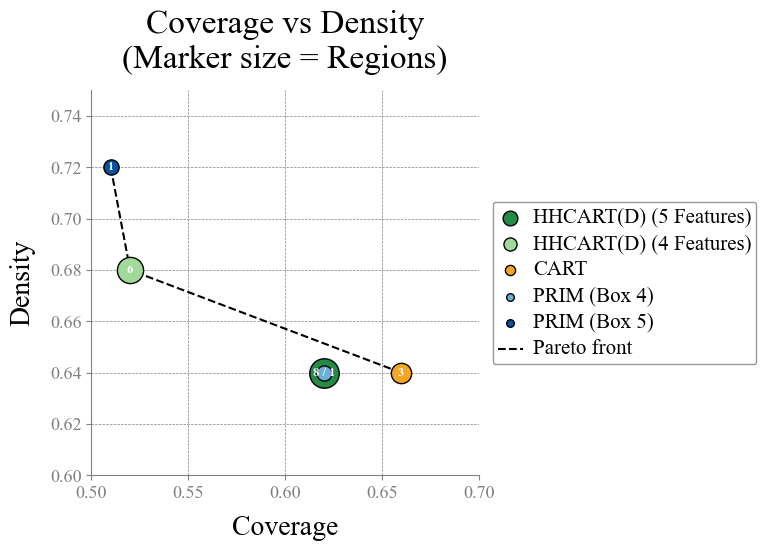

'data/comparison/coverage_density_method_comparison.png'

In [3]:
# === Apply global plot settings
apply_global_plot_settings()

# === Data (coverage/density in fractions)
df = pd.DataFrame({
    'Method': [
        "PRIM (Box 4)", "PRIM (Box 5)", "CART",
        "HHCART(D) (4 Features)", "HHCART(D) (5 Features)"
    ],
    'Regions': [1, 1, 3, 6, 8],
    'Coverage': [0.62, 0.51, 0.66, 0.52, 0.62],
    'Density': [0.64, 0.72, 0.64, 0.68, 0.64],
    'Features': [2, 2, None, 4, 5],
    'Tree depth': [None, None, 5, 4, 4]
})

# === Assign distinct colours
color_map = {
    "PRIM (Box 4)": "#6BAED6",       # lighter sky blue
    "PRIM (Box 5)": "#08519C",       # darker navy blue
    "CART": "#F5A623",               # unchanged orange
    "HHCART(D) (4 Features)": "#A1D99B",  # soft green (lime)
    "HHCART(D) (5 Features)": "#238B45"   # dark green
}
df["Color"] = df["Method"].map(color_map)

# === Scale marker sizes by region count
min_size, max_size = 120, 450
region_range = df["Regions"].max() - df["Regions"].min()
df["Size"] = min_size + (df["Regions"] - df["Regions"].min()) / region_range * (max_size - min_size)

# === Sort so smaller dots are drawn last
df = df.sort_values(by="Size", ascending=False).reset_index(drop=True)

# === Plot base points
fig, ax = plt.subplots(figsize=(5, 5))
for i in df.index:
    ax.scatter(df.loc[i, "Coverage"], df.loc[i, "Density"],
               s=df.loc[i, "Size"],
               c=df.loc[i, "Color"],
               edgecolor='black',
               label=df.loc[i, "Method"],
               zorder=10 + i)

# === Smart annotation with merge if points are close
annotated = set()
threshold = 0.01  # distance threshold for merging

for i in df.index:
    if i in annotated:
        continue
    x1, y1 = df.loc[i, 'Coverage'], df.loc[i, 'Density']
    region1 = str(df.loc[i, 'Regions'])
    merged = False

    # Check for a second close point
    for j in df.index:
        if j == i or j in annotated:
            continue
        x2, y2 = df.loc[j, 'Coverage'], df.loc[j, 'Density']
        dist = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
        if dist < threshold:
            # Merge regions
            region2 = str(df.loc[j, 'Regions'])
            merged_label = f"{region1} / {region2}"
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
            ax.text(mid_x, mid_y, merged_label, ha='center', va='center',
                    fontsize=9, weight='bold', color='white', zorder=100)
            annotated.update([i, j])
            merged = True
            break

    if not merged:
        ax.text(x1, y1, region1, ha='center', va='center',
                fontsize=9, weight='bold', color='white', zorder=100)
        annotated.add(i)

# === Compute Pareto frontier
pareto_points = []
for i, row_i in df.iterrows():
    dominated = False
    for j, row_j in df.iterrows():
        if i == j:
            continue
        if (
            row_j["Coverage"] >= row_i["Coverage"]
            and row_j["Density"] >= row_i["Density"]
            and (row_j["Coverage"] > row_i["Coverage"] or row_j["Density"] > row_i["Density"])
        ):
            dominated = True
            break
    if not dominated:
        pareto_points.append((row_i["Coverage"], row_i["Density"]))

# === Print Pareto-optimal methods
print("Pareto-optimal points (Coverage, Density):")
for (x, y) in pareto_points:
    match = df[(df["Coverage"] == x) & (df["Density"] == y)]
    for _, row in match.iterrows():
        print(f"  - {row['Method']}: ({x:.2f}, {y:.2f})")

# === Plot Pareto front
if len(pareto_points) > 1:
    pareto_points = sorted(pareto_points, key=lambda tup: tup[0])
    pareto_x, pareto_y = zip(*pareto_points)
    ax.plot(pareto_x, pareto_y, linestyle='--', color='black', linewidth=1.5,
            label='Pareto front', zorder=2)

# === Legend
legend_handles = []
seen_labels = set()
for i in df.index:
    label = df.loc[i, "Method"]
    if label not in seen_labels:
        seen_labels.add(label)
        legend_handles.append(
            Line2D([0], [0], marker='o', markersize=(df.loc[i, "Size"] ** 0.5) / 2,
                   color='black', markerfacecolor=df.loc[i, "Color"],
                   linestyle='None', label=label)
        )

# Add Pareto front to legend
pareto_handle = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Pareto front')
legend_handles.append(pareto_handle)

ax.legend(handles=legend_handles, fontsize=9,
          loc='center left', bbox_to_anchor=(1.02, 0.5))

# === Axes
ax.set_xlim(0.5, 0.7)
ax.set_ylim(0.6, 0.75)

# === Beautify and save
save_path = "data/comparison/coverage_density_method_comparison.png"
beautify_plot(ax,
              xlabel="Coverage",
              ylabel="Density",
              title="Coverage vs Density\n(Marker size = Regions)",
              save_path=save_path,
              show_grid=True)

save_path